### Importing

In [11]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

### Setting up a capture

In [12]:
cap = cv2.VideoCapture(os.path.join('abc.mp4'))

In [13]:
ret,frame = cap.read()

In [14]:
frame

array([[[ 37,  39,  32],
        [ 37,  39,  32],
        [ 37,  39,  32],
        ...,
        [195, 206, 208],
        [195, 206, 208],
        [195, 206, 208]],

       [[ 37,  39,  32],
        [ 37,  39,  32],
        [ 37,  39,  32],
        ...,
        [195, 206, 208],
        [195, 206, 208],
        [195, 206, 208]],

       [[ 37,  39,  32],
        [ 37,  39,  32],
        [ 37,  39,  32],
        ...,
        [195, 206, 208],
        [195, 206, 208],
        [195, 206, 208]],

       ...,

       [[131, 140, 141],
        [149, 158, 159],
        [161, 170, 171],
        ...,
        [168, 176, 179],
        [165, 173, 176],
        [164, 172, 175]],

       [[147, 156, 157],
        [163, 172, 173],
        [170, 179, 180],
        ...,
        [159, 167, 170],
        [162, 170, 173],
        [163, 171, 174]],

       [[162, 171, 172],
        [162, 171, 172],
        [160, 169, 170],
        ...,
        [159, 167, 170],
        [163, 171, 174],
        [165, 173, 176]]

In [15]:
frame.shape

(1080, 1920, 3)

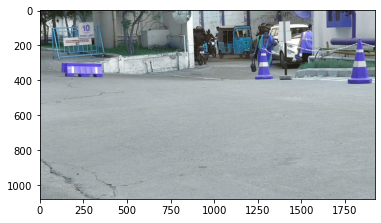

In [16]:
plt.imshow(frame)
plt.show()

In [17]:
recolor = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)

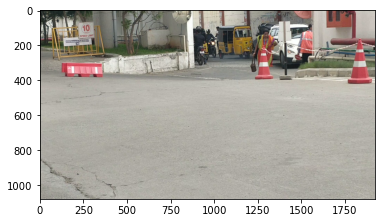

In [18]:
plt.imshow(recolor)
plt.show()

### Capture properties

In [19]:
cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

1080.0

In [20]:
cap.get(cv2.CAP_PROP_FRAME_WIDTH)

1920.0

In [35]:
# number of frames

cap.get(cv2.CAP_PROP_FRAME_COUNT)

4317.0

In [22]:
cap.get(cv2.CAP_PROP_FPS)

30.043291359832647

In [23]:
4317.0/30.043291359832647 # prints the total length of the video in seconds

143.692645

### Working with video capture

In [ ]:
# By running this code it captures total number of frames from the video (4317)

vidcap = cv2.VideoCapture('abc.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("frame%d.jpg" % count, image)     
  success,image = vidcap.read()
  print('Read a new frame: ', success)
  count += 1

### Read the image

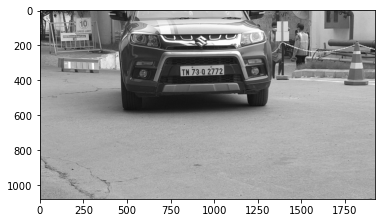

In [36]:
img = cv2.imread('frame1776.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

### Edge Detection

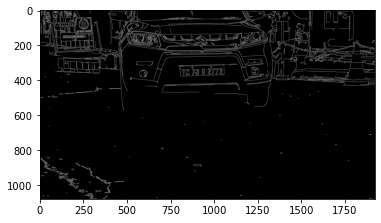

In [37]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edge = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edge, cv2.COLOR_BGR2RGB))

### Contours and  Mask

In [38]:
keypoints = cv2.findContours(edge.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [39]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [40]:
location

array([[[1054,  317]],

       [[ 806,  321]],

       [[ 805,  376]],

       [[1054,  370]]], dtype=int32)

In [41]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

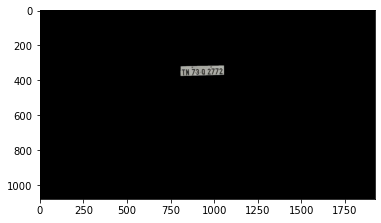

In [42]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [43]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

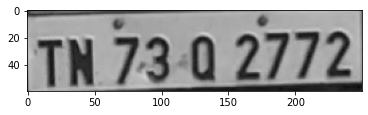

In [44]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

### Easy OCR To Read Text

In [45]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 3], [250, 3], [250, 60], [0, 60]], 'TN 73.0 2772', 0.3110867469591322)]

### Final Result

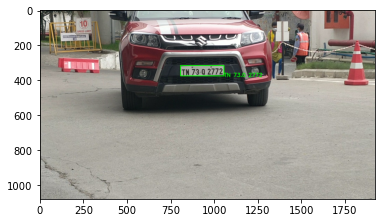

In [47]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))